<a href="https://www.kaggle.com/code/pablosebastintufino/cyclistic-bike-share-project?scriptVersionId=97929723" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic Bike Share Project (Python)

# Introduction
This analysis is for a Google Analytics Certificate capstone project. Kevin Hartman’s case study was the inspiration for this piece.

A company called Cyclistic developed a successful bike-share program in 2016. Since then, the initiative has grown to include a fleet of 5,824 bicycles that are geotracked and locked into 692 stations throughout Chicago.

Until date, Cyclistic’s marketing strategy has focused on building general awareness and appealing to a wide range of consumers. “Casual” riders are customers who purchase single-ride or full-day passes. Cyclistic “members” are customers who purchase annual memberships.

Annual members are substantially more profitable than casual riders, according to Cyclistic’s financial analysts. The company’s future prosperity, according to the director of marketing, hinges on increasing the number of yearly subscribers.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 2. Ask
**Defining the problem**

As Cyclistic realized that having more annual customers than casual riders will improve their earnings. They want to reach out to their “casual” riders, to convince them to switch to an annual subscription. In order to do so, they must first determine how the “casual” and “annual” customers differ in order to create a targeted and effective marketing message for the “casual” customers.

**Business Task**

The business task is to identify the differences between casual and annual riders in order to come up with a proper message to campaign to the casual users convincing them to switch to annual subscription. Hence, the question to be answered is:

How do annual members and casual riders use Cyclistic bikes differently?
Key Stakeholders

**Cyclistic executive team**
* My manager, Lily Moreno
* Director of marketing
* The rest of the marketing analytics team

# 3.Prepare


**Source of Data**

* Data was collected from Motivate International Inc under this license. Hence, it is public data.
Since Cyclistic is a fictional company, the datasets have different names.

**Data organization
**

* 12 csv. Files
* 13 variables

**Data credibility**

The data appears to be in good condition, and it is first-hand information, with a large number of entries and a lot of important information.

**ROCCC Analysis**

* Reliability - I think it is reliable although it is not clear if it was vetted.
* Original - Yes
* Comprehensive - I think the data is not 100% comprehensive since some information is missing although its nominal.
* Current - 12 months old
* Cited - Yes

Sort and filter the Data The data which i used was from 2021-2022. This is so because it is the most relevant period to the aforementioned business task. In addition to that, it is the period when the data is complete whereby all geo-location coordinates and bike types are included.

# 4. Process

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
Jan = pd.read_csv('../input/cyclisticbikeshare/202101-divvy-tripdata.csv')
Feb = pd.read_csv('../input/cyclisticbikeshare/202102-divvy-tripdata.csv')
Mar = pd.read_csv('../input/cyclisticbikeshare/202103-divvy-tripdata.csv')
Apr = pd.read_csv('../input/cyclisticbikeshare/202104-divvy-tripdata.csv')
May = pd.read_csv('../input/cyclisticbikeshare/202105-divvy-tripdata.csv')
Jun = pd.read_csv('../input/cyclisticbikeshare/202106-divvy-tripdata.csv')
Jul = pd.read_csv('../input/cyclisticbikeshare/202107-divvy-tripdata.csv')
Aug = pd.read_csv('../input/cyclisticbikeshare/202108-divvy-tripdata.csv')
Sep = pd.read_csv('../input/cyclisticbikeshare/202109-divvy-tripdata.csv')
Oct = pd.read_csv('../input/cyclisticbikeshare/202110-divvy-tripdata.csv')
Nov = pd.read_csv('../input/cyclisticbikeshare/202111-divvy-tripdata.csv')
Dec = pd.read_csv('../input/cyclisticbikeshare/202112-divvy-tripdata.csv')


In [3]:
df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

# Joining 12 CSV's into 1 and naming it as "df". from year 2021

df

# Top 5 & bottom 5 rows of dataframe "df".

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,1/23/2021 16:14,1/23/2021 16:24,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,1/27/2021 18:43,1/27/2021 18:47,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,1/21/2021 22:35,1/21/2021 22:37,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,1/7/2021 13:31,1/7/2021 13:42,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,1/23/2021 2:24,1/23/2021 2:24,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


# 4.1 Cleaning Process

In [4]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    5595063
dtype: int64

In [6]:
df.columns.is_unique

True

There are no duplicated values. But there are a lot of null values in station and a little bit in latitude, langtidue. So i will clean it up

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [9]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
247528,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881372,-87.640042,41.888456,-87.644336,casual
247532,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881999,-87.639265,41.888415,-87.644342,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


In [10]:
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [11]:
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:00,2021-01-24 19:22:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:00,2021-01-23 13:02:00,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,5
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,9
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:00,2021-01-24 16:07:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,11


In [13]:
df.sort_values(by = 'ride_length')

# Sorting Values by "ride_length" column in Ascending order.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
142091,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,13128,Larrabee St & Webster Ave,13193,41.911738,-87.632145,41.921762,-87.644034,casual,-55
125855,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,41.922167,-87.638888,41.911386,-87.638677,member,-54
260820,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,41.912580,-87.681424,41.902906,-87.687367,member,-53
282673,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,41.928712,-87.653833,41.935733,-87.663576,casual,-53
104018,CDB307B8494885AD,electric_bike,2021-11-07 01:55:09,2021-11-07 01:02:26,Sedgwick St & Webster Ave,13191,Halsted St & Roscoe St,TA1309000025,41.922190,-87.638957,41.943615,-87.649029,casual,-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,49107
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,52701
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,53921
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,55691


In [14]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

df[df['ride_length'] < 0].count()

# Number of rows containing Negative Values.

ride_id               51
rideable_type         51
started_at            51
ended_at              51
start_station_name    51
start_station_id      51
end_station_name      51
end_station_id        51
start_lat             51
start_lng             51
end_lat               51
end_lng               51
member_casual         51
ride_length           51
dtype: int64

In [15]:
df[df['ride_length'] < 1].count()

# Number of rows containing "ride length" less than "1" minute.

ride_id               59017
rideable_type         59017
started_at            59017
ended_at              59017
start_station_name    59017
start_station_id      59017
end_station_name      59017
end_station_id        59017
start_lat             59017
start_lng             59017
end_lat               59017
end_lng               59017
member_casual         59017
ride_length           59017
dtype: int64

In [16]:
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:00,2021-01-24 19:22:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7
1,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:00,2021-01-23 13:02:00,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,5
2,57C750326F9FDABE,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9
3,4D518C65E338D070,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,9
4,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:00,2021-01-24 16:07:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529280,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881372,-87.640042,41.888456,-87.644336,casual,4
4529281,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881999,-87.639265,41.888415,-87.644342,casual,4
4529282,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,7
4529283,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,8


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

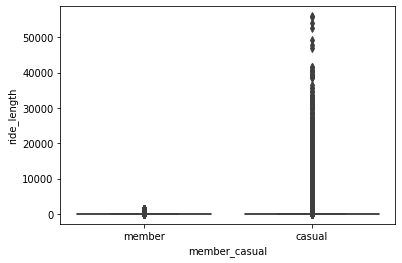

In [17]:
sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.

In [18]:
df = df.astype({'ride_id':'string', 'rideable_type':'category'})

# Coverting datatypes of each columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529285 entries, 0 to 4529284
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         int32         
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), object(5), string(1)
memory usage: 436.3+ MB


In [19]:
df.shape

# Number of Rows and Columns

(4529285, 14)

In [20]:
df.isna().sum()

# Checking if Dataframe "df" contains any missing values

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
dtype: int64

In [21]:
df['ride_id'] = df['ride_id'].str.strip()

# Removing leading and trailing whitespaces in column "Ride Id".

df[df['ride_id'].duplicated()]

# View any duplicate rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length


# 5. Analyze and Share

In [22]:
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['hour'] = df['started_at'].dt.hour

df = df.astype({'year':'int16', 'hour':'int8'})

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:00,2021-01-24 19:22:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7,2021,January,Sunday,19
1,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:00,2021-01-23 13:02:00,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,5,2021,January,Saturday,12
2,57C750326F9FDABE,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9,2021,January,Saturday,15
3,4D518C65E338D070,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,9,2021,January,Saturday,15
4,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:00,2021-01-24 16:07:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,11,2021,January,Sunday,15


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529285 entries, 0 to 4529284
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         int32         
 14  year                int16         
 15  month               category      
 16  day_of_week         category      
 17  hour                int8          
dtypes: category(3), datetime64[ns](2), float64(4), int16(1), int32(1), int8(1), object

# 5.1
# Analyzing the Difference in Number of Rides Between Casual riders and Members.

Number of Rides in Each Month# 5.1.1
# Total Number of Rides in 1 Year

In [24]:
pd.pivot_table(df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,2027983
member,2501302
Total Count,4529285


In [25]:
fig_1 = df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, x = 'member_casual', y = 'ride_id', range_y = [0,3000000],
        color = 'member_casual', 
        height = 500,
        text = 'ride_id',
        title = 'Number of Rides in the year',
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.2
# Number of Rides in Each Month

In [26]:
df_pv1 = pd.pivot_table(df,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)]
df_pv1

count
                                     ride_id
year        month     member_casual         
2021        January   casual           14629
                      member           68345
            February  casual            8508
                      member           33793
            March     casual           75059
                      member          128349
            April     casual          119362
                      member          175261
            May       casual          214652
                      member          230505
            June      casual          300769
                      member          299743
            July      casual          365513
                      member          317690
            August    casual          338138
                      member          327946
            September casual          290078
                      member          323287
            October   casual          187324
                      member          284140
            November  casual           69267
                      member          182922
            December  casual           44684
                      member          129321
Total Count                          4529285

In [27]:
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,400000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True,
        title = 'Number of Rides by Month',
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.3
# Average Number of Rides by days of the Weekday

In [28]:
pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          399568
            member          305904
Monday      casual          226619
            member          341195
Tuesday     casual          212815
            member          382551
Wednesday   casual          215998
            member          392043
Thursday    casual          222064
            member          368125
Friday      casual          287215
            member          360269
Saturday    casual          463704
            member          351215
Total Count                4529285

In [29]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        title= 'Number of Rides by days of the Weekday',
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.4
# Average Number of Rides in Each Hour

In [30]:
pd.pivot_table(df,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           41893
            member           24849
1           casual           30386
            member           16072
2           casual           19405
            member            8819
3           casual           10132
            member            5012
4           casual            6628
            member            5904
5           casual            8729
            member           25265
6           casual           19233
            member           70716
7           casual           35730
            member          128708
8           casual           49259
            member          147613
9           casual           60279
            member          106636
10          casual           84479
            member          103827
11          casual          111237
            member          125030
12          casual          131987
            member          144716
13          casual          140806
            member          141879
14          casual          144693
            member          139702
15          casual          151786
            member          162471
16          casual          166240
            member          213390
17          casual          194050
            member          269497
18          casual          174504
            member          224978
19          casual          133683
            member          158696
20          casual           96996
            member          104587
21          casual           81952
            member           76022
22          casual           75699
            member           57642
23          casual           58197
            member           39271
Total Count                4529285

In [31]:
fig_4 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,300000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 title = 'Number of Rides in Each Hour',
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

# 5.2
# Analyzing Difference in Average Ride Length Between Casual riders and Members

# 5.2.1
# Average Ride Length in the Year

In [32]:
pd.pivot_table(df,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
member_casual,
casual,32.344340
member,12.903152
Total Ride Average,21.607925


In [33]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length',
        title = 'Average Ride Length in the Year',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.2.2
# Average Ride Length in Each Month

In [34]:
pd.pivot_table(df,
               index = ['year', 'month', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                           ride_length
year               month     member_casual            
2021               January   casual          26.481304
                             member          12.114185
                   February  casual          47.222379
                             member          14.540141
                   March     casual          38.284683
                             member          13.349539
                   April     casual          38.287110
                             member          13.971425
                   May       casual          39.541556
                             member          14.073933
                   June      casual          38.461933
                             member          13.870062
                   July      casual          33.143634
                             member          13.519651
                   August    casual          28.350650
                             member          13.261491
                   September casual          27.868973
                             member          12.833021
                   October   casual          26.070541
                             member          11.716369
                   November  casual          22.213262
                             member          10.631936
                   December  casual          24.568548
                             member          10.245853
Total Ride Average                           21.607925

In [35]:
fig_5 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_5, x = 'month', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length',
        title = 'Average Ride Length in Each Month',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (Oct 2020 - Sep 2021)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* Average ride lenght of casual riders are more than twice than members in all months.
* It´s more than evident, that february is higher than the other months. In evidence, [(you can read this article here)](https://www.nbcchicago.com/news/local/nws-chicago-had-9th-snowiest-february-on-record-with-nearly-2-feet-of-snow/2450777/) Chicago had 9th Snowiest February on Record and snowstorm in 2021. 
* In other words, riders were not able to return bikes as usual and bikes were stuck with them in February. 


# Average Ride Length by days of the week

In [36]:
pd.pivot_table(df,
               index = ['day_of_week', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          37.505236
                   member          14.972063
Monday             casual          32.479099
                   member          12.438831
Tuesday            casual          28.598008
                   member          12.082491
Wednesday          casual          28.056871
                   member          12.154042
Thursday           casual          27.789507
                   member          12.050600
Friday             casual          30.731149
                   member          12.505669
Saturday           casual          34.728383
                   member          14.583631
Total Ride Average                 21.607925

In [37]:
fig_6 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length',
        title = 'Average Ride Length by days of the week',       
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* In Weekends casual riders' ride length is maximum when compared to Weekdays.
* Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends.
* Both Casual riders and Members use bikes for long rides during Weekends.

# Average Ride Length by hour of the day

In [38]:
pd.pivot_table(df,
               index = ['hour', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
hour               member_casual            
0                  casual          34.278113
                   member          12.411405
1                  casual          37.653031
                   member          13.703708
2                  casual          42.859469
                   member          13.551423
3                  casual          44.784544
                   member          13.516361
4                  casual          48.131110
                   member          11.741701
5                  casual          23.587925
                   member          10.443895
6                  casual          20.673062
                   member          11.314342
7                  casual          21.023510
                   member          11.523759
8                  casual          23.778863
                   member          11.397228
9                  casual          29.136465
                   member          12.056341
10                 casual          33.873258
                   member          12.895624
11                 casual          34.110323
                   member          13.143630
12                 casual          34.313985
                   member          12.940594
13                 casual          35.433817
                   member          13.257882
14                 casual          35.699972
                   member          13.603205
15                 casual          34.713808
                   member          13.451354
16                 casual          31.777111
                   member          13.372262
17                 casual          29.563293
                   member          13.513375
18                 casual          29.868886
                   member          13.372574
19                 casual          30.347075
                   member          13.198877
20                 casual          31.956039
                   member          13.073422
21                 casual          32.197762
                   member          12.679882
22                 casual          32.833287
                   member          12.718452
23                 casual          34.465952
                   member          12.466604
Total Ride Average                 21.607925

In [39]:
fig_7 = round(df.groupby(['hour', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_7, x = 'hour', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length',
        title = 'Average Ride Length by hours of the day',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'hour': 'hour of day'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.3
# Analyzing Difference in Rideable Type Usage Between Casual riders and Members.

In [40]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1248464
              member         1952052
docked_bike   casual          310104
              member               1
electric_bike casual          469415
              member          549249
Total Rides                  4529285

In [41]:
fig_8 = df.groupby(['rideable_type', 'member_casual',], as_index=False).count()

px.bar(fig_8, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'rideable_type': 'bikes'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Most Popular Day of the Week for Bike Rentals

In [42]:
dw = df[['day_of_week', 'member_casual', 'ride_id']]
dw = dw.groupby(['day_of_week', 'member_casual'], as_index=False)[['ride_id']].count()

px.bar(dw, x = 'day_of_week', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'day_of_week': 'Days of week'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'day_of_week': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Most Popular Month of the Year for Bike Rentals

In [43]:
df4 = df[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

px.bar(df4, x = 'month', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'month': 'Months'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Customer Type vs Station

In [44]:
top10_start = df.groupby('start_station_name')['start_station_name'].count().sort_values(ascending=False).head(10)
top10_start

start_station_name
Streeter Dr & Grand Ave     79207
Michigan Ave & Oak St       42200
Wells St & Concord Ln       41181
Millennium Park             39952
Clark St & Elm St           39054
Wells St & Elm St           35666
Theater on the Lake         35353
Kingsbury St & Kinzie St    31751
Clark St & Lincoln Ave      31641
Clark St & Armitage Ave     31076
Name: start_station_name, dtype: int64

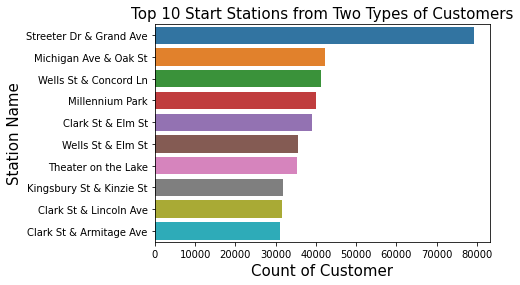

In [45]:
fig, ax = plt.subplots()

sns.barplot(data=df, y=top10_start.index, x=top10_start, ax=ax)

ax.set_title("Top 10 Start Stations from Two Types of Customers", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

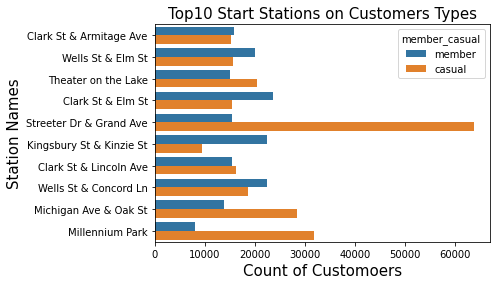

In [46]:
fig, ax = plt.subplots()

top10_start_stations = [
    "Streeter Dr & Grand Ave",
    "Michigan Ave & Oak St",
    "Wells St & Concord Ln",
    "Millennium Park",
    "Clark St & Elm St",
    "Wells St & Elm St",
    "Theater on the Lake",
    "Kingsbury St & Kinzie St",
    "Clark St & Lincoln Ave",
    "Clark St & Armitage Ave"
    ]

start_result = df[df['start_station_name'].isin(top10_start_stations)]

sns.countplot(data=start_result, y='start_station_name', hue='member_casual', ax=ax)

plt.title("Top10 Start Stations on Customers Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

In [47]:
casual = df[df['member_casual'] == 'casual']
casual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
2,57C750326F9FDABE,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9,2021,January,Saturday,15
3,4D518C65E338D070,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,9,2021,January,Saturday,15
4,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:00,2021-01-24 16:07:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,11,2021,January,Sunday,15


In [48]:
annual = df[df['member_casual'] == 'member']
annual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:00,2021-01-24 19:22:00,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7,2021,January,Sunday,19
1,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:00,2021-01-23 13:02:00,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,5,2021,January,Saturday,12
5,49FCE1F8598F12C6,electric_bike,2021-01-22 15:15:00,2021-01-22 15:36:00,California Ave & Cortez St,17660,Wells St & Elm St,KA1504000135,41.900373,-87.696790,41.903272,-87.634457,member,21,2021,January,Friday,15


In [49]:
casual_list = casual['start_station_name'].value_counts().head(10)
casual_list

Streeter Dr & Grand Ave       63726
Millennium Park               31843
Michigan Ave & Oak St         28350
Shedd Aquarium                22294
Theater on the Lake           20391
Lake Shore Dr & Monroe St     18890
Wells St & Concord Ln         18706
Clark St & Lincoln Ave        16137
Wells St & Elm St             15687
Indiana Ave & Roosevelt Rd    15645
Name: start_station_name, dtype: int64

In [50]:
annual_list = annual['start_station_name'].value_counts().head(10)
annual_list

Clark St & Elm St            23575
Wells St & Concord Ln        22475
Kingsbury St & Kinzie St     22362
Wells St & Elm St            19979
Dearborn St & Erie St        18374
St. Clair St & Erie St       18033
Wells St & Huron St          18011
Broadway & Barry Ave         16736
Clinton St & Madison St      16134
Desplaines St & Kinzie St    15906
Name: start_station_name, dtype: int64

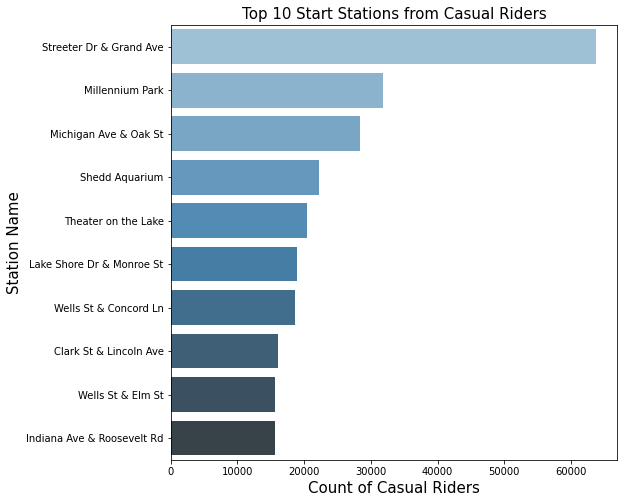

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_list.index, x=casual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 10 Start Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

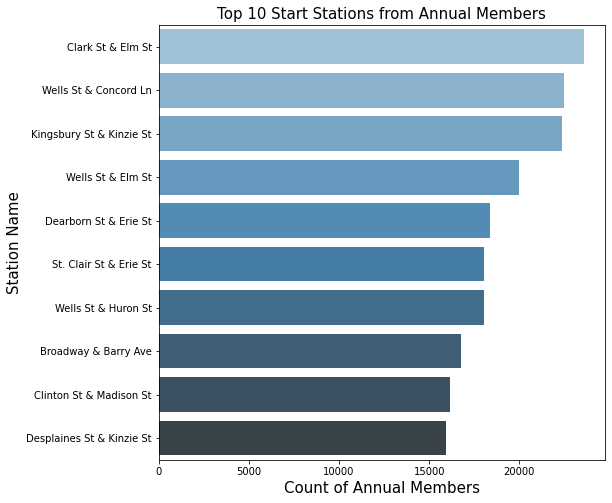

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_list.index, x=annual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 10 Start Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

In [53]:
top10_end = df.groupby('end_station_name')['end_station_name'].count().sort_values(ascending=False).head(10)
top10_end

end_station_name
Streeter Dr & Grand Ave     80690
Michigan Ave & Oak St       42940
Wells St & Concord Ln       41567
Millennium Park             41253
Clark St & Elm St           38489
Theater on the Lake         35835
Wells St & Elm St           35506
Clark St & Lincoln Ave      31633
Wabash Ave & Grand Ave      31511
Kingsbury St & Kinzie St    31375
Name: end_station_name, dtype: int64

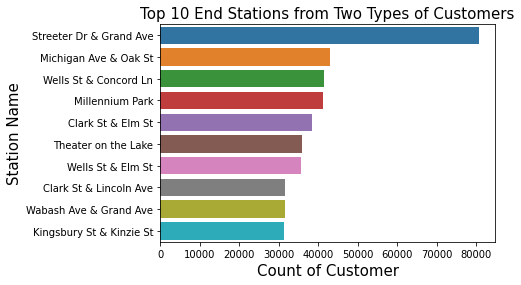

In [54]:
fig, ax = plt.subplots()

sns.barplot(data=df, y=top10_end.index, x=top10_end, ax=ax)

ax.set_title("Top 10 End Stations from Two Types of Customers", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

In [55]:
top10_end_list = df['end_station_name'].value_counts().head(10)
top10_end_list

Streeter Dr & Grand Ave     80690
Michigan Ave & Oak St       42940
Wells St & Concord Ln       41567
Millennium Park             41253
Clark St & Elm St           38489
Theater on the Lake         35835
Wells St & Elm St           35506
Clark St & Lincoln Ave      31633
Wabash Ave & Grand Ave      31511
Kingsbury St & Kinzie St    31375
Name: end_station_name, dtype: int64

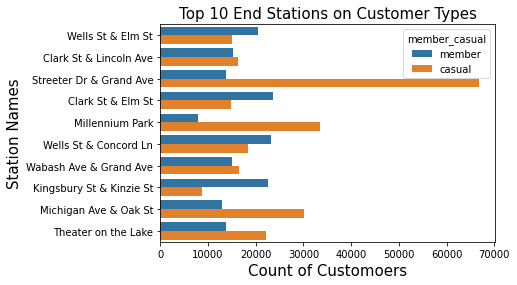

In [56]:
fig, ax = plt.subplots()

top10_end_stations = [
    "Streeter Dr & Grand Ave",
    "Michigan Ave & Oak St",
    "Wells St & Concord Ln",
    "Millennium Park",
    "Clark St & Elm St","Wells St & Elm St","Theater on the Lake","Clark St & Lincoln Ave","Wabash Ave & Grand Ave",
    "Kingsbury St & Kinzie St"
    ]

end_result = df[df['end_station_name'].isin(top10_end_stations)]

sns.countplot(data=end_result, y='end_station_name', hue='member_casual', ax=ax)

plt.title("Top 10 End Stations on Customer Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

In [57]:
casual_endlist = casual['end_station_name'].value_counts().head(10)
casual_endlist

Streeter Dr & Grand Ave               66804
Millennium Park                       33402
Michigan Ave & Oak St                 30053
Theater on the Lake                   22078
Shedd Aquarium                        20908
Wells St & Concord Ln                 18445
Lake Shore Dr & Monroe St             17737
Lake Shore Dr & North Blvd            16918
DuSable Lake Shore Dr & North Blvd    16493
Wabash Ave & Grand Ave                16410
Name: end_station_name, dtype: int64

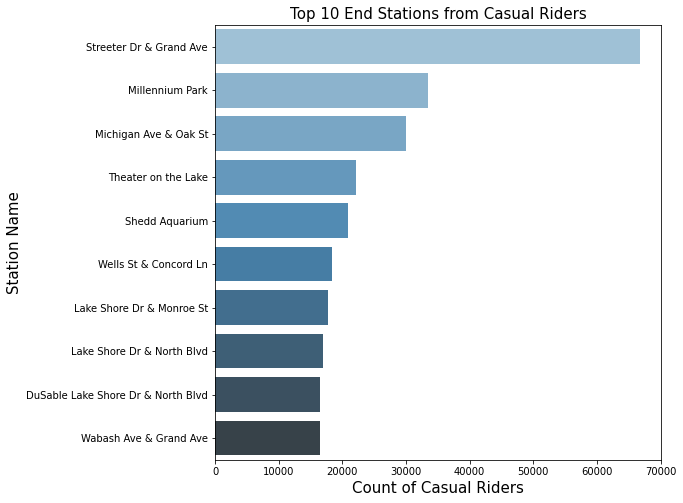

In [58]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_endlist.index, x=casual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 10 End Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

In [59]:
annual_endlist = annual['end_station_name'].value_counts().head(10)
annual_endlist

Clark St & Elm St           23646
Wells St & Concord Ln       23122
Kingsbury St & Kinzie St    22548
Wells St & Elm St           20533
Dearborn St & Erie St       19033
St. Clair St & Erie St      17859
Wells St & Huron St         17674
Broadway & Barry Ave        17319
Clinton St & Madison St     16525
Green St & Madison St       16078
Name: end_station_name, dtype: int64

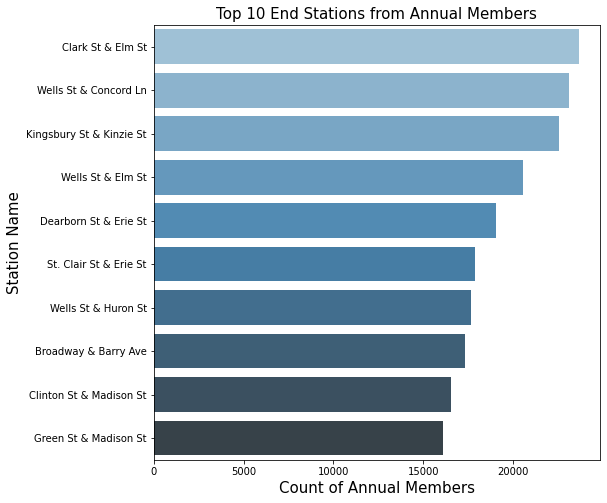

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_endlist.index, x=annual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 10 End Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

# 5.4
# Map Of Casual riders and Members.

In [61]:
df_start= df.groupby(['start_lat','start_lng','end_lat','end_lng','member_casual'],as_index=False).size().sort_values(by='size',ascending=False)
df_start_1 = df_start[df_start['size'] > 50]

In [62]:
fig = px.scatter_mapbox(df_start_1, lat="start_lat", lon="start_lng",color="member_casual", size="size",
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
    mapbox=dict(
#         accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.80,
            lon=-87.61
        ),
        pitch=0,
        zoom=10
    ))

fig.show()

In [63]:
# To show how many members to casuals there are
# There are 25% more members than casual
df['member_casual'].value_counts()

member    2501302
casual    2027983
Name: member_casual, dtype: int64

# 6.Act

# 6.1 Conclusions

Analysis
Differences in behavior between Casual and Member users

On average Casual users ride at least 30 minutes whilst Member users ride between 12-14 minutes at most.

The average riding duration for Casual users is longer on Saturday and Sunday (weekends).

Findings

Although Casual users on average ride the longest time more than member users during both weekdays and even more on weekends, member users ride more constantly through out the whole week.

I could not come up with any recommendations on this stage so i went a step further by:

Checking the number of rides by user type during the week.

Confirming the average travel distance by each user type.

Number of rides taken by each customer type during the week

# 6.2 Recommendations
* A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.

* Promotions aiming at current Weekday casual riders must be implemented as soon as possible. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

* A Loyalty Program for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.